# 수치형 변수 변환하기


### 주어진 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후, f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오
- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작

### 박스-콕스
![박스-콕스](https://wikimedia.org/api/rest_v1/media/math/render/svg/b565ae8f1cce1e4035e2a36213b8c9ce34b5029d)

### 여-존슨
![여-존슨](https://wikimedia.org/api/rest_v1/media/math/render/svg/2a99e24c81226f3d0547c471281197ea265553c5)

In [1]:
# 라이브러리 및 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 맞는 데이터
df_twup = df[df['age']>=20]

In [3]:
# 최빈값으로 'f1' 컬럼 결측치 대체
df_twup['f1'] = df_twup['f1'].fillna(df_twup.f1.mode()[0])

In [4]:
df_twup

,id,age,city,f1,f2,f3,f4,f5
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,50.0,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,50.0,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899


In [5]:
# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
from sklearn.preprocessing import power_transform
df_twup['yeo-johnson'] = power_transform(df_twup[['f1']], standardize=False)

In [6]:
# 'f1'데이터 박스-콕스 box-cox 값 구하기
df_twup['box-cox'] = power_transform(df_twup[['f1']], method='box-cox', standardize=False)

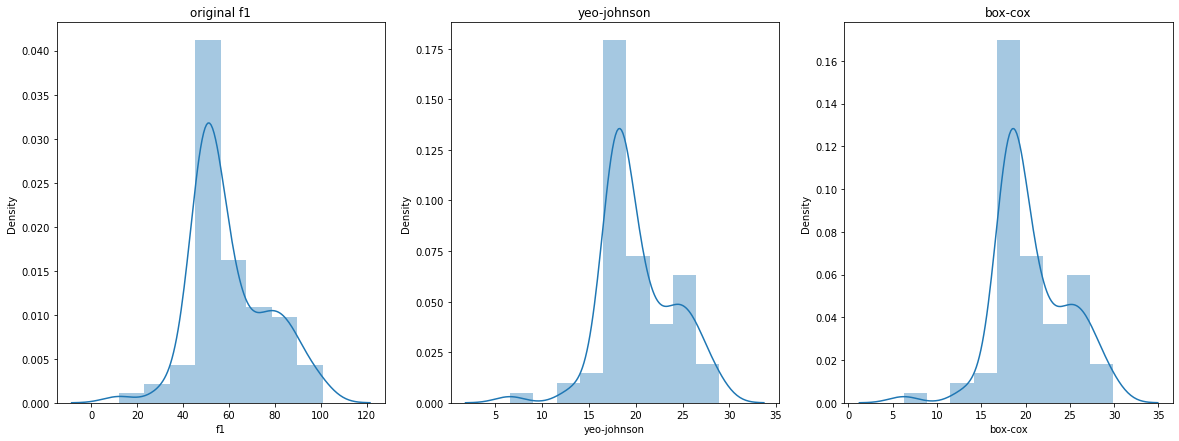

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 7))
sns.distplot(df_twup['f1'], ax=axs[0])
sns.distplot(df_twup['yeo-johnson'], ax=axs[1])
sns.distplot(df_twup['box-cox'], ax=axs[2])
axs[0].set_title('original f1')
axs[1].set_title('yeo-johnson')
axs[2].set_title('box-cox')
plt.show()

선형 회귀 때 **정규성**이나 **등분산성** 가정을 만족하지 않는 경우 처리하는 방법
1. Box-Cox 변환
2. Yeo-Johnson Power Transformations
     - Box-Cox 변환시 y가 0이거나 0보다 작은 경우는 적용할 수 없다는 한계를 계선

In [8]:
# 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)
round(abs(df_twup['box-cox'] - df_twup['yeo-johnson']).sum(),2)

39.17

## Hint
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html

In [9]:
from sklearn.preprocessing import power_transform
data = [[11, 12], [23, 22], [34, 35]]
print(power_transform(data)) # method 디폴트 값은 여-존슨’yeo-johnson’
print(power_transform(data, method='box-cox'))

[[-1.27332767 -1.24414502]
 [ 0.10376846  0.03976901]
 [ 1.16955921  1.20437601]]
[[-1.27548765 -1.24611441]
 [ 0.1087368   0.04392064]
 [ 1.16675085  1.20219377]]


## 풀이

In [10]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import power_transform

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')
df.head(5)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [11]:
# 조건에 맞는 데이터
print("조건 적용 전:", df.shape)
df = df[df['age']>=20]
print("조건 적용 후:", df.shape)

조건 적용 전: (100, 8)
조건 적용 후: (83, 8)


In [12]:
# 최빈값으로 'f1' 컬럼 결측치 대체
print("결측치 처리 전: \n", df.isnull().sum())
print("최빈값: ",df['f1'].mode()[0])
df['f1'] = df['f1'].fillna(df['f1'].mode()[0])
print("결측치 처리 후: \n", df.isnull().sum())   

결측치 처리 전: 
 id       0
age      0
city     0
f1      26
f2       0
f3      78
f4       0
f5       0
dtype: int64
최빈값:  50.0
결측치 처리 후: 
 id       0
age      0
city     0
f1       0
f2       0
f3      78
f4       0
f5       0
dtype: int64


In [13]:
# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
df['y'] = power_transform(df[['f1']]) # method 디폴트 값은 여-존슨’yeo-johnson’
df['y'].head()

2    0.101083
3   -0.585402
4    1.463459
5   -0.143094
6    0.040578
Name: y, dtype: float64

In [14]:
# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
df['y'] = power_transform(df[['f1']],standardize=False) # method 디폴트 값은 여-존슨’yeo-johnson’
df['y'].head()

2    20.583423
3    17.968081
4    25.773745
5    19.653167
6    20.352915
Name: y, dtype: float64

In [15]:
# 'f1'데이터 박스-콕스 box-cox 값 구하기
df['b'] = power_transform(df[['f1']], method='box-cox')
df['b'].head()

2    0.100290
3   -0.585656
4    1.463969
5   -0.143784
6    0.039801
Name: b, dtype: float64

In [16]:
# 'f1'데이터 박스-콕스 box-cox 값 구하기
df['b'] = power_transform(df[['f1']], method='box-cox', standardize=False)
df['b'].head()

2    21.067090
3    18.305263
4    26.557680
5    20.084373
6    20.823545
Name: b, dtype: float64

In [17]:
## 박스콕스 방법2
from scipy import stats
x = stats.boxcox(df['f1'])
x

(array([21.06708953, 18.3052633 , 26.5576802 , 20.08437298, 20.82354507,
        29.92014513, 24.11822132, 22.73510562, 18.3052633 , 18.3052633 ,
        22.50057055, 26.5576802 , 18.3052633 , 26.9892231 , 18.3052633 ,
        18.3052633 , 24.34492271, 16.71079147, 18.3052633 , 20.08437298,
        20.82354507, 13.87430348, 24.79522889, 21.78961583, 28.47348918,
        18.3052633 , 18.3052633 , 24.79522889, 18.3052633 , 18.3052633 ,
        18.3052633 , 24.34492271, 19.58413896, 17.78149164, 20.82354507,
        18.3052633 , 27.20371216, 18.3052633 , 24.34492271, 27.20371216,
        25.01886978, 18.3052633 , 25.90374843, 18.3052633 , 18.3052633 ,
        21.55009581, 18.3052633 , 18.3052633 , 18.3052633 , 21.30926323,
        18.3052633 , 26.77388356, 21.30926323, 18.3052633 , 18.3052633 ,
        18.82186921, 16.9815023 , 26.5576802 , 26.34059934, 18.3052633 ,
        29.30451924, 17.51679379,  6.25392521, 12.96923726, 28.89049447,
        18.3052633 , 20.82354507, 18.3052633 , 18.3

In [18]:
# 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)
round(sum(np.abs(df['y'] - df['b'])),2)

39.17